In [2]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft 

## intuitions
The MCMC algorithm, for inference, has a good test for the 1-dim parameter space, the auto-correlation function $\tau$. It is natural to extend this metric for a higher dimensional parameter space: to have a auto-correlation matrix, which could be computed similarly. Notice that in this case the matrix is not necessarily symmetric. 

And although such a matrix should be easy to define, how can we tell from it if the MCMC is been working well? a few possible options are
- maximum eigen value  
- maximum of its entries
- symmetric? it would be nice if it is symmetric. is there a measure for deviance from the symmetric? 

To compute it fastly we need to implement how to compute the entries of this matrix, the 

$$
\tau(t,X^i,X^j) = \sum_{k=1}^{N-t} X^i_k X^j_{k+t}
$$
where $X$ is a matrix with its rows indexing the samples and columns indexing the parameters. We have $N$ samples and $m$-dim parameters.  

In [3]:
next_pow_2 = lambda n: 2**(int(np.log2(n))+2)

In [4]:
N = 100000

In [5]:
X = np.random.normal(size=N)

In [6]:
X = X - np.mean(X)

In [11]:
n = next_pow_2(N)
fX = fft.fft(X,n)
H = fX*np.conjugate(fX)
fft_acf = fft.ifft(H,n)[:N].real
fft_acf = fft_acf/fft_acf[0]

In [12]:
true_acf = [ np.mean(X[:-i]*X[i:]) for i in range(1,N)]
true_acf = np.array([np.var(X)] + true_acf)

Text(0.5, 1.0, 'relative error of true acf and fft acf')

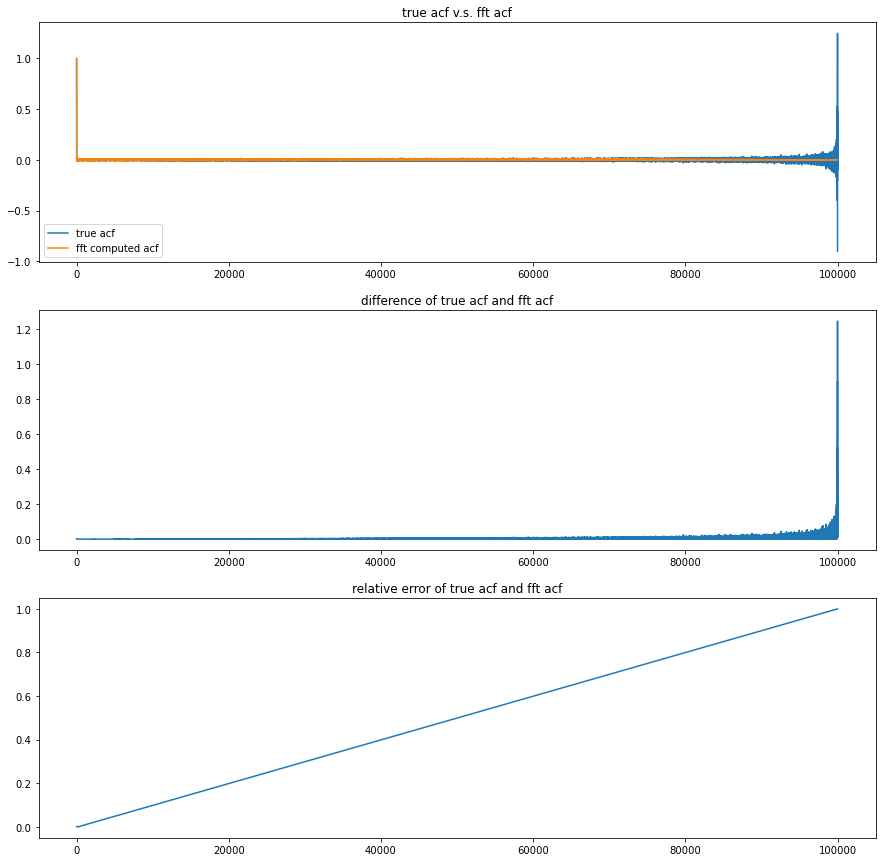

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.plot(true_acf,label='true acf')
plt.plot(fft_acf,label='fft computed acf')
plt.title("true acf v.s. fft acf")
plt.legend()

plt.subplot(3,1,2)
plt.plot(np.abs(true_acf - fft_acf))
plt.title('difference of true acf and fft acf')

plt.subplot(3,1,3)
plt.plot(np.abs(((true_acf - fft_acf)/true_acf)))
plt.title('relative error of true acf and fft acf')

Text(0.5, 0.98, 'same graph without the first and last few terms')

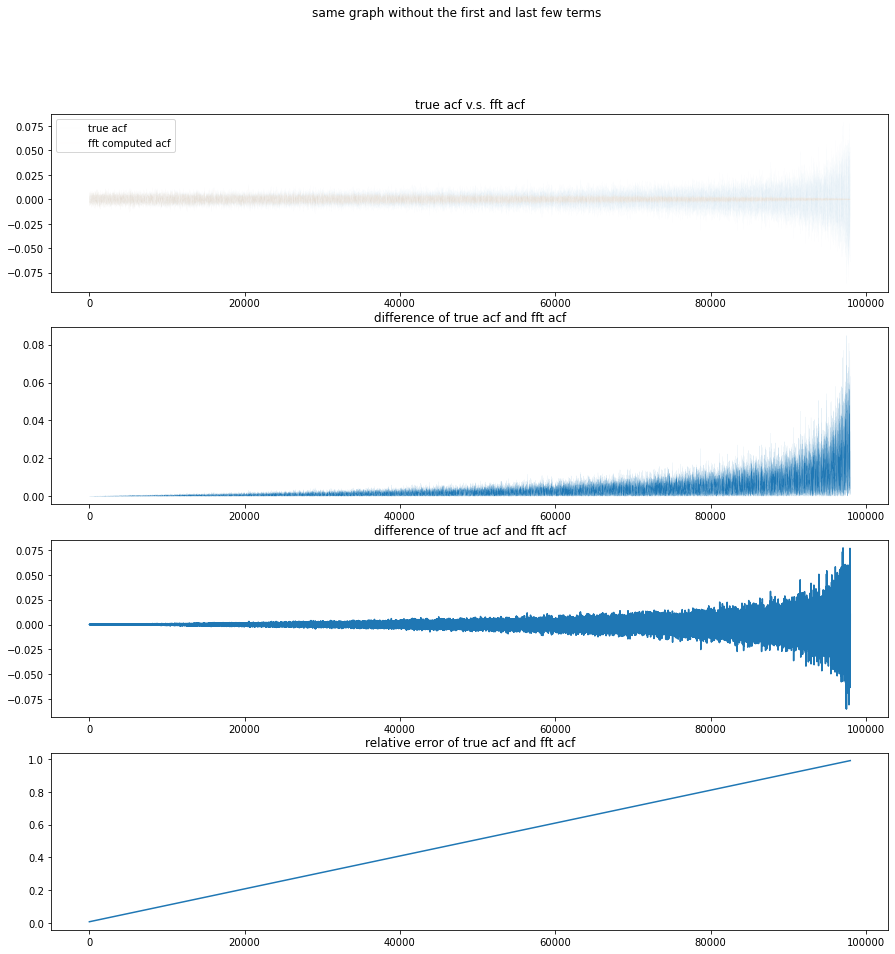

In [14]:
plt.figure(figsize=(15,15))

burnin = 1000
discard = -1000

plt.subplot(4,1,1)
plt.plot(true_acf[burnin:discard],label='true acf',linewidth=0.005)
plt.plot(fft_acf[burnin:discard],label='fft computed acf',linewidth=0.005)
plt.title("true acf v.s. fft acf")
plt.legend()

plt.subplot(4,1,2)
plt.plot(np.abs(true_acf - fft_acf)[burnin:discard],linewidth=0.05)
plt.title('difference of true acf and fft acf')

plt.subplot(4,1,3)
plt.plot((true_acf - fft_acf)[burnin:discard])
plt.title('difference of true acf and fft acf')

plt.subplot(4,1,4)
plt.plot(np.abs(((true_acf - fft_acf)/true_acf))[burnin:discard])
plt.title('relative error of true acf and fft acf')

plt.suptitle('same graph without the first and last few terms')

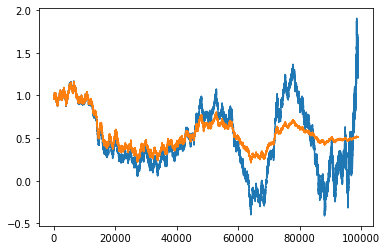

In [15]:
plt.plot(true_acf.cumsum()[:discard])
plt.plot(fft_acf.cumsum()[:discard])

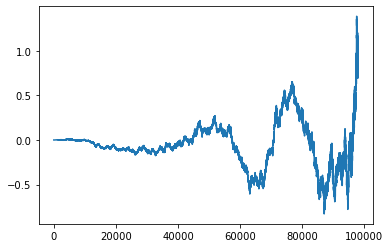

In [16]:
plt.plot((true_acf - fft_acf)[burnin:discard].cumsum())

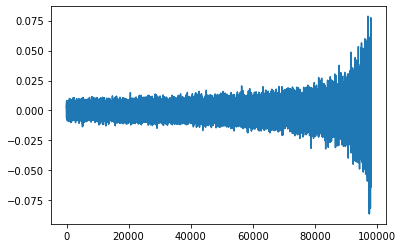

In [18]:
plt.plot(true_acf[burnin:discard])

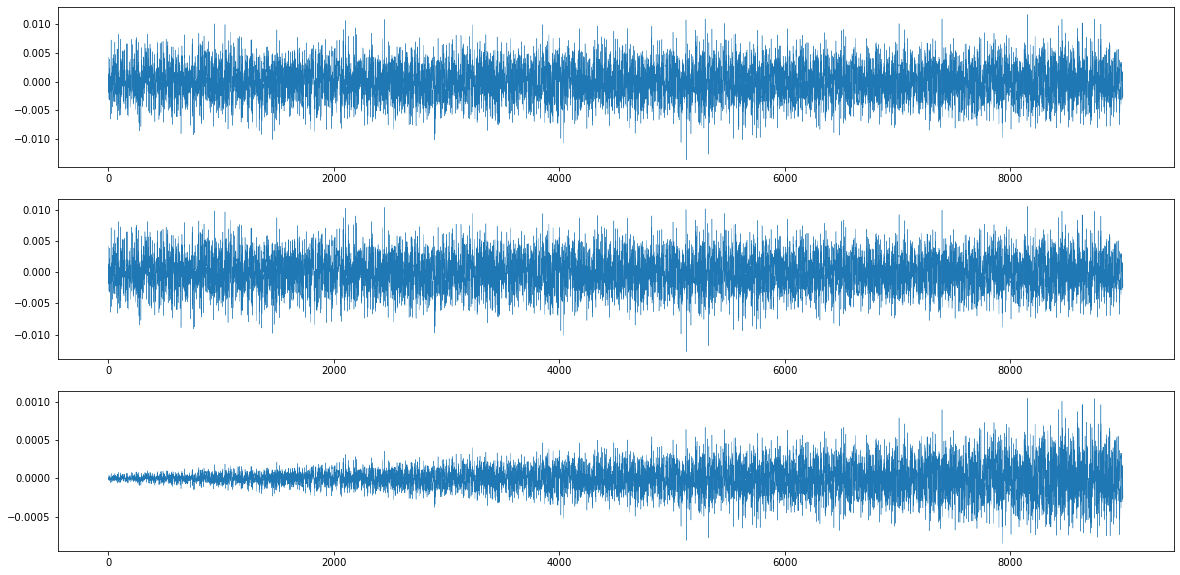

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot((true_acf)[burnin:10000], linewidth=0.4)
plt.subplot(3,1,2)
plt.plot(fft_acf[burnin:10000],linewidth=0.4)
plt.subplot(3,1,3)
plt.plot((true_acf-fft_acf)[burnin:10000], linewidth=0.4)

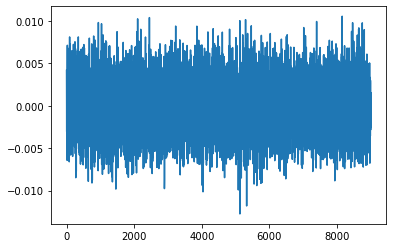